In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

plt.figure().set_figwidth(50)

<Figure size 5000x480 with 0 Axes>

In [3]:
data_1 = pd.read_csv("cc_institution_details.csv")

data_1.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [4]:
#Getting the total number of nan values and non - nan values count

data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  long_x                                3798 non-null   float64
 11  lat_y            

In [5]:
# Drop columns, 'EIN' and 'NAME'.
# data_1 = data_1.drop(['EIN','NAME'],1)
data_1 = data_1.drop(columns='city')
data_1 = data_1.drop(columns='state')
data_1 = data_1.drop(columns='similar')
data_1.head()

,index,unitid,chronname,level,control,basic,hbcu,flagship,long_x,lat_y,...,vsa_enroll_elsewhere_after4_transfer,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.568502,34.783368,...,17.2,36.4,5.6,17.2,11.1,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.809170,33.502230,...,NaN,NaN,NaN,NaN,NaN,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,-86.174010,32.362609,...,NaN,NaN,NaN,NaN,NaN,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,4-year,Public,Research Universities--very high research acti...,NaN,NaN,-86.638420,34.722818,...,0.0,0.0,0.0,0.0,0.0,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,-86.295677,32.364317,...,NaN,NaN,NaN,NaN,NaN,13,386,88.0|07,ASU,1351.0


In [6]:
# Determine the number of unique values in each column.
data_1.nunique()

index                                   3798
unitid                                  3798
chronname                               3793
level                                      2
control                                    3
basic                                     33
hbcu                                       1
flagship                                   1
long_x                                  3798
lat_y                                   3798
site                                    3333
student_count                           2829
awards_per_value                         517
awards_per_state_value                   160
awards_per_natl_value                      6
exp_award_value                         3611
exp_award_state_value                    264
exp_award_natl_value                       6
exp_award_percentile                     101
ft_pct                                   835
fte_value                               2745
fte_percentile                           101
med_sat_va

In [ ]:
# # Look at "" value counts for binning
# _count = data_1." ".value_counts()
# _count

49676
282385


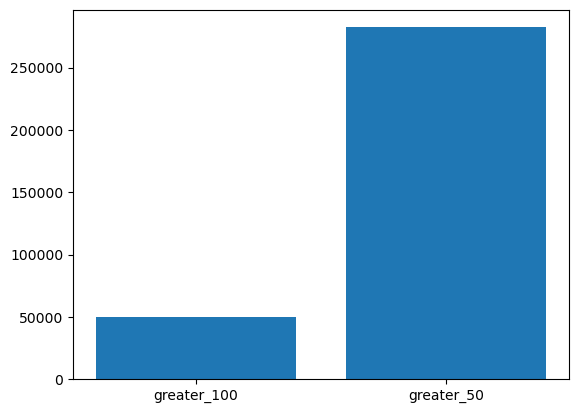

In [6]:
# Now getting how many grad_100 are more than 50 and greater than 100

data_of_graduates = list(data_1["grad_100"])
percentage_of_graduates = list(data_1["grad_100_rate"])
greater_50 = 0
greater_100 = 0

for i in data_of_graduates:
    if i < 100:
        greater_50+=1
    else:
        greater_100+=1
        
print(greater_100)
print(greater_50)

y=[greater_100,greater_50]
x=["greater_100","greater_50"]

plt.bar(x,y)
plt.show()

102968
229093


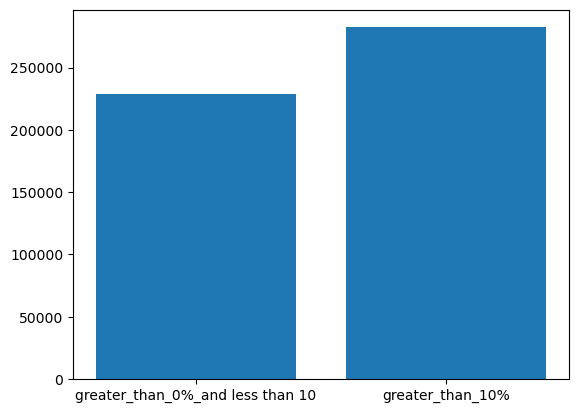

In [7]:
# Here we are visualizing grad_100 rate that are more than 0 and less than 10 and grad_100 rate greater than 10

data_of_graduates = list(data_1["grad_100"])
percentage_of_graduates = list(data_1["grad_100_rate"])
greater_0 = 0
greater_10 = 0

for i in percentage_of_graduates:
    if i < 10:
        greater_0+=1
    else:
        greater_10+=1
        
print(greater_0)
print(greater_10)

y=[greater_10,greater_50]
x=["greater_than_0%_and less than 10","greater_than_10%"]

plt.bar(x,y)
plt.show()

91583
240478


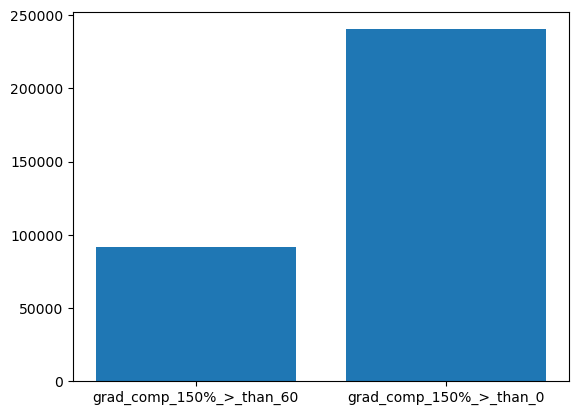

In [8]:
# Now getting how many grad_150 are more than 50 and greater than 100

data_of_graduates = list(data_1["grad_150"])
percentage_of_graduates = list(data_1["grad_150_rate"])
greater_0 = 0
greater_60 = 0

for i in data_of_graduates:
    if i < 60:
        greater_0+=1
    else:
        greater_60+=1
        
print(greater_60)
print(greater_0)

y=[greater_60,greater_0]
x=["grad_comp_150%_>_than_60","grad_comp_150%_>_than_0"]

plt.bar(x,y)
plt.show()

281927
50134


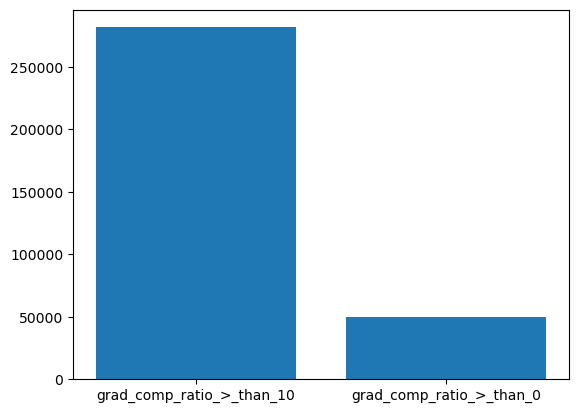

In [9]:
# Now getting how many grad_150 percentage are more than 10 and less than 10

data_of_graduates = list(data_1["grad_150"])
percentage_of_graduates = list(data_1["grad_150_rate"])
greater_0 = 0
greater_10 = 0

for i in percentage_of_graduates:
    if i < 10:
        greater_0+=1
    else:
        greater_10+=1
        
print(greater_10)
print(greater_0)

y=[greater_10,greater_0]
x=["grad_comp_ratio_>_than_10","grad_comp_ratio_>_than_0"]

plt.bar(x,y)
plt.show()

In [10]:

data_1 = data_1.drop(columns=["id_number","unitid"])

data_1.head()


,grads_year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
18,2012,B,X,2y all,594.0,40.0,87.0,6.7,14.6
36,2013,B,X,2y all,594.0,46.0,54.0,7.7,9.1
54,2011,B,X,2y all,261.0,25.0,42.0,9.6,16.1
72,2012,B,X,2y all,281.0,41.0,41.0,14.6,14.6


In [11]:
data = pd.get_dummies(data_1)

data.head()

,grads_year,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate,gender_B,gender_F,gender_M,race_A,race_Ai,race_B,race_H,race_W,race_X,cohort_2y all,cohort_4y bach,cohort_4y other
0,2011,446.0,73.0,105.0,16.4,23.5,1,0,0,0,0,0,0,0,1,1,0,0
18,2012,594.0,40.0,87.0,6.7,14.6,1,0,0,0,0,0,0,0,1,1,0,0
36,2013,594.0,46.0,54.0,7.7,9.1,1,0,0,0,0,0,0,0,1,1,0,0
54,2011,261.0,25.0,42.0,9.6,16.1,1,0,0,0,0,0,0,0,1,1,0,0
72,2012,281.0,41.0,41.0,14.6,14.6,1,0,0,0,0,0,0,0,1,1,0,0


In [12]:
# Now we will apply linear regression and logistic regression model 
# on the above four different parameters that are grad_150,grad_100 and there percentage columns as prediction variables and others as X 
# we will be dropping the first two columns as they are just codes 


x = data.iloc[:,:-5]

y = data_1.iloc[:,-4]

x_train = data.iloc[:500000,:-5]

y_train = data_1.iloc[:500000,-4]


x_test = data.iloc[500000:,:-5]

y_test = data_1.iloc[500000:,-4]



linear_regression = LinearRegression()
logistic = LogisticRegression()

# Applying linear regression and logistic regression on graduation number finished in 100 percent estimated time

linear_regression.fit(x_train,y_train)

print("Score of linear model ",linear_regression.score(x,y))


Score of linear model  1.0


In [13]:
x = data.iloc[:,:-5]

y = data_1.iloc[:,-3]

x_train = data.iloc[:500000,:-5]

y_train = data_1.iloc[:500000,-3]


x_test = data.iloc[500000:,:-5]

y_test = data_1.iloc[500000:,-3]



linear_regression = LinearRegression()
logistic = LogisticRegression(solver='liblinear')

# Applying linear regression and logistic regression on graduation number finished in 100 percent estimated time

linear_regression.fit(x_train,y_train)

print("Score of linear model ",linear_regression.score(x,y))


Score of linear model  1.0


In [14]:

x = data.iloc[:,:-5]

y = data_1.iloc[:,-2]

x_train = data.iloc[:500000,:-5]

y_train = data_1.iloc[:500000,-2]


x_test = data.iloc[500000:,:-5]

y_test = data_1.iloc[500000:,-2]


linear_regression = LinearRegression()
logistic = LogisticRegression(solver='liblinear')

# Applying linear regression and logistic regression on graduation number finished in 100 percent estimated time


linear_regression.fit(x_train,y_train)

print("Score of linear model ",linear_regression.score(x,y))


Score of linear model  1.0


In [14]:
x = data.iloc[:,:-5]

y = data_1.iloc[:,-1]

x_train = data.iloc[:500000,:-5]

y_train = data_1.iloc[:500000,-1]


x_test = data.iloc[500000:,:-5]

y_test = data_1.iloc[500000:,-1]


linear_regression = LinearRegression()
logistic = LogisticRegression(solver='liblinear')

# Applying linear regression and logistic regression on graduation number finished in 100 percent estimated time
linear_regression.fit(x_train,y_train)

print("Score of linear model ",linear_regression.score(x,y))


Score of linear model  1.0
